In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
np.random.seed(42)
X = 3*np.random.rand(100,1)
y = 2 + 5*X + np.random.randn(100,1)

In [81]:
from sklearn.base import BaseEstimator
class LinearRegressionGD(BaseEstimator):

  """
    Linear regression using Gradient Descent optimization algorithm
  """

  def __init__(self,lr=0.01,epochs=100,random_state=42):
    self.lr = lr
    self.epochs = epochs
    self.random_state = random_state
  
  def fit(self,X,y):
    np.random.seed(self.random_state)
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    self.theta = np.random.randn(X_b.shape[1],1)
    for _ in range(self.epochs):
      output = X_b.dot(self.theta)
      gradient = (2/X_b.shape[0])*X_b.T.dot(output-y)
      self.theta = self.theta - self.lr*gradient
    self.intercept_ = self.theta[0][0]
    self.coef_ = np.ravel(self.theta[1:])
    return self
  
  def predict(self,X):
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    return X_b.dot(self.theta)

In [82]:
# %%timeit
lin_reg = LinearRegressionGD(0.01,50)
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(2.785972168202402, array([4.38348452]))

In [83]:
from sklearn.base import BaseEstimator
class LinearRegressionSGD(BaseEstimator):
  """
    Linear regression using SGD optimization algorithm
  """
  def __init__(self,lr=0.01,epochs=100,random_state=42):
    self.lr = lr
    self.epochs = epochs
    self.random_state = random_state
  def fit(self,X,y):
    np.random.seed(self.random_state)
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    self.theta = np.random.randn(X_b.shape[1],1)
    for _ in range(self.epochs):
      for i in range(len(X_b)):
        random_ind = np.random.randint(len(X_b))
        X_random = X_b[random_ind:random_ind+1]
        y_random = y[random_ind:random_ind+1]
        output = X_random.dot(self.theta)
        gradient = 2*X_random.T.dot(output-y_random)
        self.theta = self.theta - self.lr*gradient
    self.intercept_ = self.theta[0][0]
    self.coef_ = np.ravel(self.theta[1:])
    return self
  
  def predict(self,X):
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    return X_b.dot(self.theta)

In [84]:
# %%timeit
lin_reg_sgd = LinearRegressionSGD(0.01,50)
lin_reg_sgd.fit(X,y)
lin_reg_sgd.intercept_,lin_reg_sgd.coef_

(2.134341663426798, array([4.68398889]))

In [59]:
np.c_[np.ones((len(X),1)),X][71]

array([1.        , 0.59614704])

In [92]:
from sklearn.base import BaseEstimator
class LinearRegressionMBGD(BaseEstimator):
  """
    Linear regression using Mini-Batch GD optimization algorithm
  """
  def __init__(self,lr=0.01,epochs=100,random_state=42,batch_size=32):
    self.lr = lr
    self.epochs = epochs
    self.random_state = random_state
    self.batch_size = batch_size
  def fit(self,X,y):
    np.random.seed(self.random_state)
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    self.theta = np.random.randn(X_b.shape[1],1)
    for _ in range(self.epochs):
      for i in range(len(X_b)):
        random_ind = np.random.randint(len(X_b)-self.batch_size)
        X_random = X_b[random_ind:random_ind+self.batch_size]
        y_random = y[random_ind:random_ind+self.batch_size]
        output = X_random.dot(self.theta)
        gradient = (2/self.batch_size)*X_random.T.dot(output-y_random)
        self.theta = self.theta - self.lr*gradient
    self.intercept_ = self.theta[0][0]
    self.coef_ = np.ravel(self.theta[1:])
    return self
  def predict(self,X):
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    return X_b.dot(self.theta)

In [86]:
# %%timeit
lin_reg_mbgd = LinearRegressionMBGD(lr=0.01,epochs=50,batch_size=16)
lin_reg_mbgd.fit(X,y)
lin_reg_mbgd.intercept_,lin_reg_mbgd.coef_

(2.096900871682858, array([4.94549035]))

In [87]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr.intercept_,lr.coef_

(array([2.21509616]), array([[4.84674226]]))

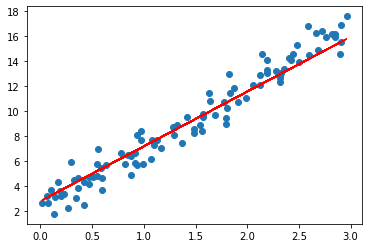

In [88]:
plt.scatter(X,y)
plt.plot(X,lin_reg.coef_*X+lin_reg.intercept_,'r-')

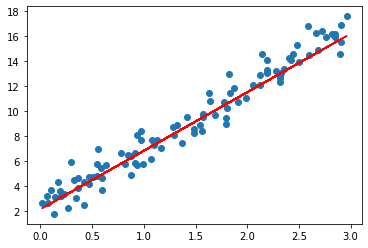

In [89]:
plt.scatter(X,y)
plt.plot(X,lin_reg_sgd.coef_*X+lin_reg_sgd.intercept_,'r-')

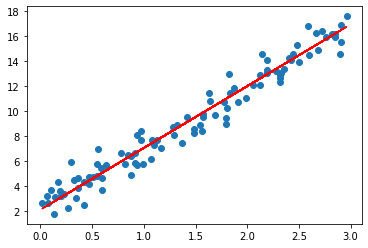

In [90]:
plt.scatter(X,y)
plt.plot(X,lin_reg_mbgd.coef_*X+lin_reg_mbgd.intercept_,'r-')

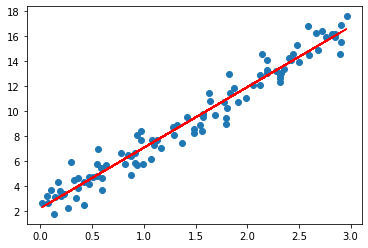

In [91]:
plt.scatter(X,y)
plt.plot(X,lr.coef_*X+lr.intercept_,'r-')

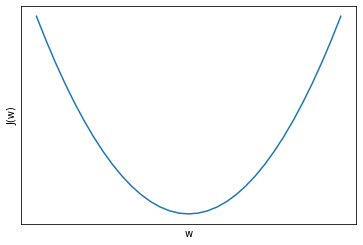

In [102]:
a = np.arange(-21,12)
b = (a+5)**2 + 5
plt.plot(a,b)
plt.xlabel('w')
plt.ylabel('J(w)')
plt.xticks([])
plt.yticks([]);

In [113]:
import pandas as pd
data = [[lin_reg.coef_[0],lin_reg.intercept_],
        [lin_reg_sgd.coef_[0],lin_reg_sgd.intercept_],
        [lin_reg_mbgd.coef_[0],lin_reg_mbgd.intercept_],
        [lr.coef_[0][0],lr.intercept_[0]]]
cols = ['coef_','intercept_']
ind = ['GD','SGD','MBGD','Scikit-learn LinReg']
df = pd.DataFrame(data=data,columns=cols,index=ind)
df

,coef_,intercept_
GD,4.383485,2.785972
SGD,4.683989,2.134342
MBGD,4.945490,2.096901
Scikit-learn LinReg,4.846742,2.215096


In [112]:
lr.coef_[0][0],lr.intercept_[0]

(4.846742257625657, 2.215096157546747)

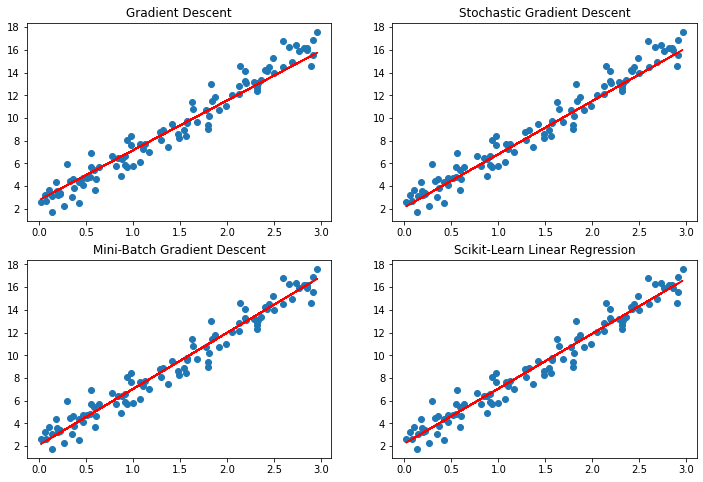

In [116]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8))
ax[0][0].scatter(X,y)
ax[0][0].plot(X,lin_reg.coef_*X+lin_reg.intercept_,'r-')
ax[0][0].set_title('Gradient Descent')

ax[0][1].scatter(X,y)
ax[0][1].plot(X,lin_reg_sgd.coef_*X+lin_reg_sgd.intercept_,'r-')
ax[0][1].set_title('Stochastic Gradient Descent')

ax[1][0].scatter(X,y)
ax[1][0].plot(X,lin_reg_mbgd.coef_*X+lin_reg_mbgd.intercept_,'r-')
ax[1][0].set_title('Mini-Batch Gradient Descent')

ax[1][1].scatter(X,y)
ax[1][1].plot(X,lr.coef_[0][0]*X+lr.intercept_[0],'r-')
ax[1][1].set_title('Scikit-Learn Linear Regression');